In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r"C:\Users\jmasa\OneDrive - University of Johannesburg\Thesis\ML Projects\Python\Cell Voltage\data\Cell_Voltage_Combined_9Mar.xlsx"
df = pd.read_excel(file_path)
df.head()

,Current_Density_Acm-2,Pressure_Bar,Temperature_oC,KOH_Concentration_wt%,Electrodes_Gap_mm,Cell_Voltage_V
0,0.018,10,50,28,0.0,1.497
1,0.018,20,50,28,0.0,1.509
2,0.018,30,50,28,0.0,1.506
3,0.018,40,50,28,0.0,1.516
4,0.018,50,50,28,0.0,1.518


In [5]:
df.tail()

,Current_Density_Acm-2,Pressure_Bar,Temperature_oC,KOH_Concentration_wt%,Electrodes_Gap_mm,Cell_Voltage_V
485,0.110,1,50,10,10.0,2.054
486,0.090,1,50,10,10.0,2.019
487,0.078,1,50,10,10.0,1.977
488,0.066,1,50,10,10.0,1.943
489,0.054,1,50,10,10.0,1.902


In [6]:
df.shape

(490, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Current_Density_Acm-2  490 non-null    float64
 1   Pressure_Bar           490 non-null    int64  
 2   Temperature_oC         490 non-null    int64  
 3   KOH_Concentration_wt%  490 non-null    int64  
 4   Electrodes_Gap_mm      490 non-null    float64
 5   Cell_Voltage_V         490 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 23.1 KB


In [8]:
# Check for missing values
df.isnull().sum()


Current_Density_Acm-2    0
Pressure_Bar             0
Temperature_oC           0
KOH_Concentration_wt%    0
Electrodes_Gap_mm        0
Cell_Voltage_V           0
dtype: int64

In [9]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

In [10]:
# Summary statistics for numerical columns
df.describe()


,Current_Density_Acm-2,Pressure_Bar,Temperature_oC,KOH_Concentration_wt%,Electrodes_Gap_mm,Cell_Voltage_V
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.262045,10.746939,37.918367,18.922449,10.459184,2.104624
std,0.187902,17.417795,16.303407,11.191497,11.866606,0.284081
min,0.007000,1.000000,20.000000,10.000000,0.000000,1.464000
25%,0.100250,1.000000,25.000000,10.000000,0.000000,1.900000
50%,0.215000,1.000000,25.000000,10.000000,10.000000,2.190000
75%,0.392000,10.000000,50.000000,28.000000,10.000000,2.351000
max,0.721000,55.000000,70.000000,50.000000,50.000000,2.505000


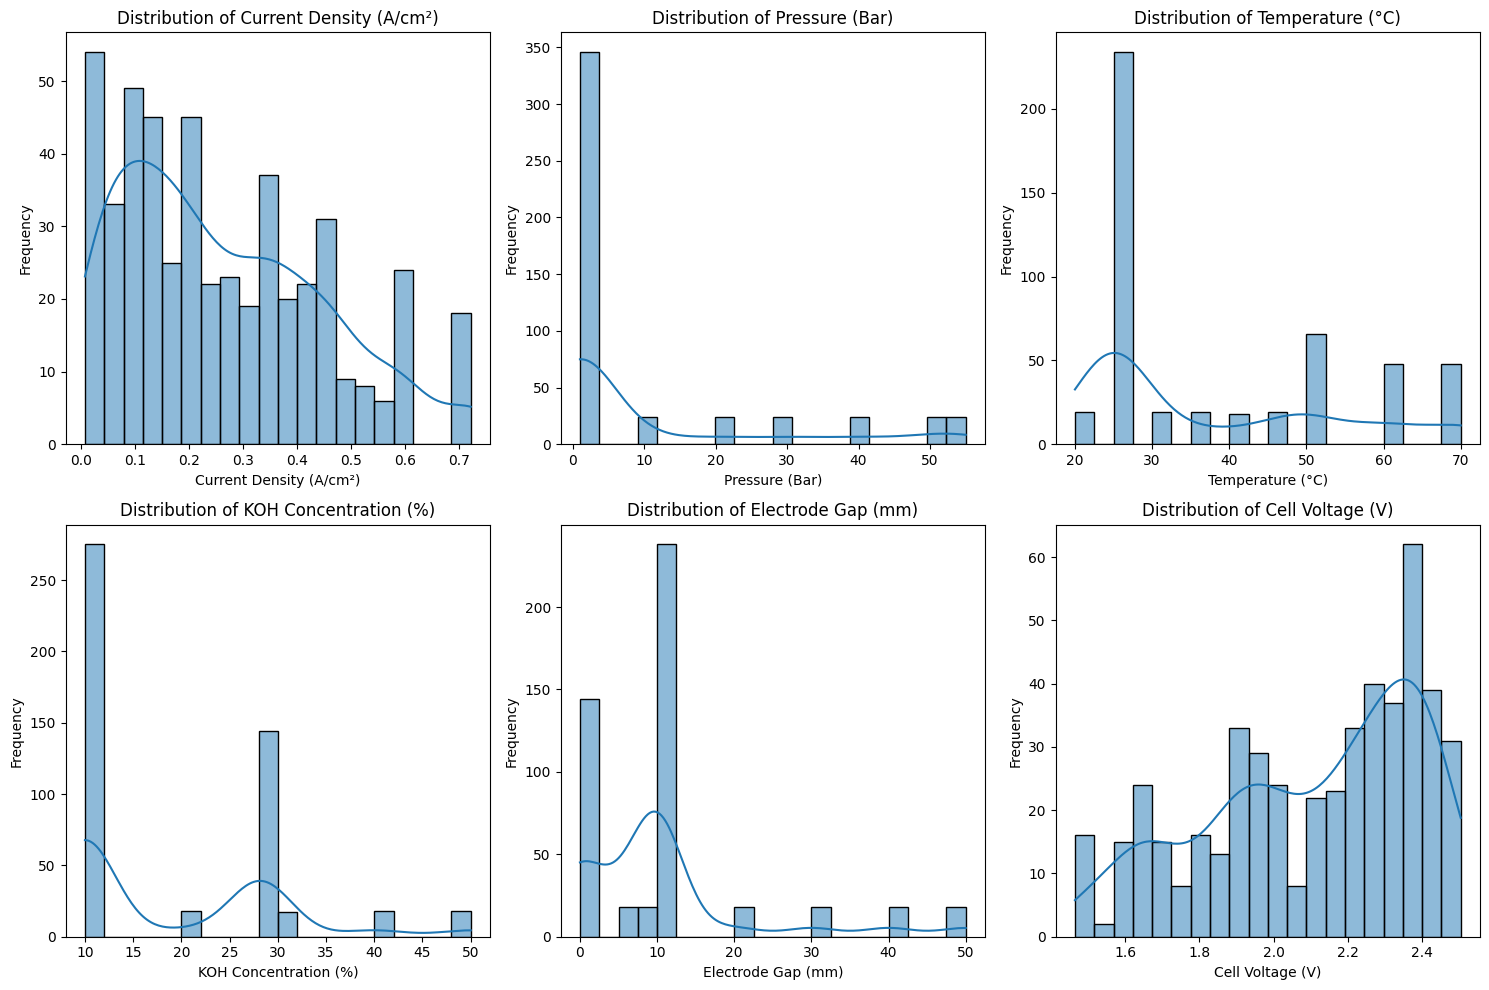

In [11]:
# Set up a 2x3 grid for plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# List of features
features = ['Current_Density_Acm-2', 'Pressure_Bar', 'Temperature_oC', 'KOH_Concentration_wt%', 'Electrodes_Gap_mm', 'Cell_Voltage_V']
titles = ['Current Density (A/cm²)', 'Pressure (Bar)', 'Temperature (°C)', 'KOH Concentration (%)', 'Electrode Gap (mm)', 'Cell Voltage (V)']

# Plot histograms
for i, (feature, title) in enumerate(zip(features, titles)):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {title}')
    axes[i//3, i%3].set_xlabel(title)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


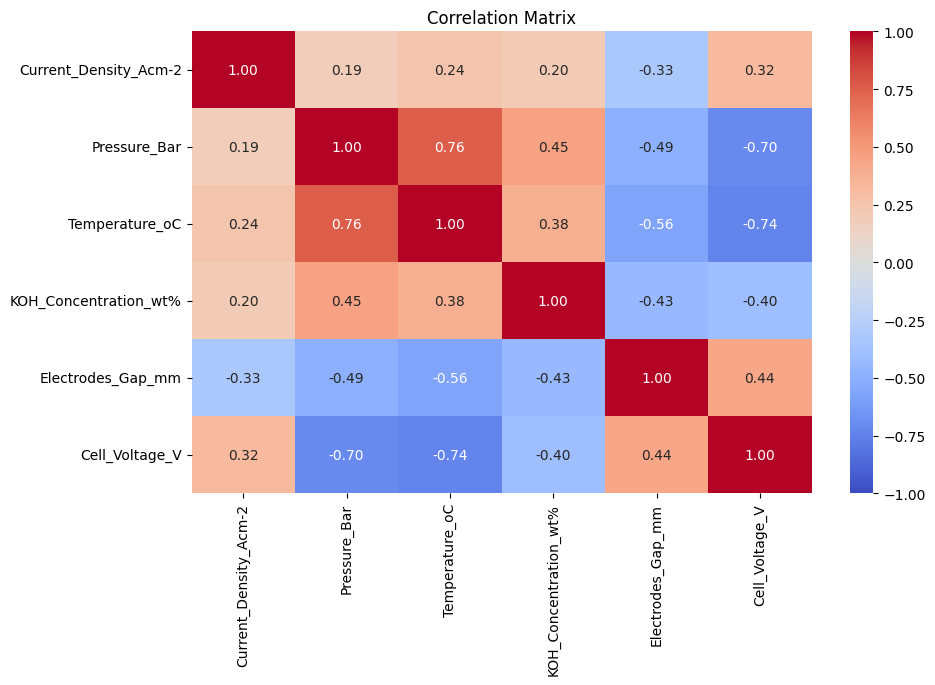

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
